In [1]:
import pandas as pd
import wikipedia

from pathlib import Path

In [4]:
DATA_PATH = Path('../data')

In [5]:
with (DATA_PATH / 'descriptions.txt').open(mode='r') as f:
    text = f.read()

In [12]:
len(text.split('===========================\n'))

192622

In [22]:
names = []
descriptions = []
for definition in text.split('===========================\n'):
    business_name, _, business_description = definition.partition('\n')
    names.append(business_name)
    descriptions.append(business_description.strip())

In [25]:
df = pd.DataFrame({
    'name': names,
    'description': descriptions
})
print(df.shape)
df.head()

(192622, 2)


,name,description
0,ibm,International Business Machines Corporation (I...
1,tata consultancy services,Tata Consultancy Services (TCS) is an Indian m...
2,accenture,The accentors are a genus of birds in the fami...
3,us army,
4,ey,


In [36]:
df = df.loc[df.description.str.len() > 0]
print(df.shape)

(125995, 2)


In [38]:
df.description.str.split('\s').apply(len).describe()

count    125995.000000
mean        137.947133
std         127.840170
min           3.000000
25%          56.000000
50%          99.000000
75%         177.000000
max        4351.000000
Name: description, dtype: float64

<AxesSubplot:ylabel='Frequency'>

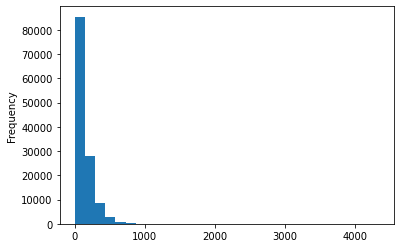

In [40]:
df.description.str.split('\s').apply(len).plot.hist(bins=30)